# Final Exam Notebook

Problem 6 using Python packages:

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [5]:
m = np.matrix([[5,-3,0], [-3, 5,0],[0,0,4]])
print(m)

[[ 5 -3  0]
 [-3  5  0]
 [ 0  0  4]]


In [6]:
lamda, evectors = np.linalg.eig(m)
lamda = np.float64(lamda)
evectors = np.float64(evectors)

In [7]:
print(lamda)
print(evectors)

[ 8.  2.  4.]
[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Problem 11:

In [29]:
# Part a)
iris_df = pd.read_csv('./Iris.csv')
iris_df.set_index('Id',inplace=True)
print(iris_df.shape)
iris_df.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Target values
target_names = iris_df.Species.unique()
target_values = np.array(iris_df["Species"])
iris_df.drop(['Species'], axis=1,inplace=True)
print(target_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [31]:
# Fit 2 components to PCA
pca = PCA(n_components=2)
iris_2d = pca.fit(iris_df).transform(iris_df)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.92461621  0.05301557]


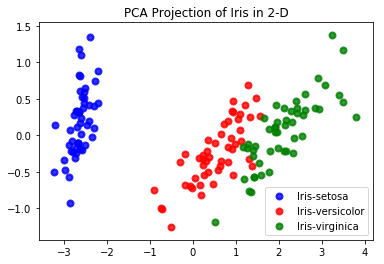

In [33]:
plt.figure()
colors = ['blue', 'red', 'green']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(iris_2d[target_values == i, 0], iris_2d[target_values == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA Projection of Iris in 2-D');

These classes appear to be very well separated from each other. While virginica and versicolor appear closer together, the transformation does an adequate job separating them.

In [35]:
# Part b)
# Load data-set again to make it easier:
iris_df2 = pd.read_csv('./Iris.csv')
df_train = iris_df2[iris_df2['Species'] == target_names[0]][0:35]
for t in target_names[1:]:
    df_train = pd.concat([df_train, iris_df2[iris_df2['Species'] == t][0:35]])

df_test = iris_df2[iris_df2['Species'] == target_names[0]][35:]
for t in target_names[1:]:
    df_test = pd.concat([df_test, iris_df2[iris_df2['Species'] == t][35:]])

In [40]:
print(df_train.shape)
print(df_test.shape)

(105, 6)
(45, 6)


In [41]:
df_train_y = df_train["Species"]
df_train.drop(['Species'], axis=1,inplace=True)
df_test_y = df_test["Species"]
df_test.drop(["Species"],axis=1,inplace=True)

In [43]:
# Use Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(df_train, df_train_y)

GaussianNB(priors=None)

In [46]:
pred = classifier.predict(df_test)

miss = (df_test_y != pred).sum()
accuracy = 1.0 - miss / df_test_y.shape[0]
print("Accuracy: ", accuracy*100,"%")

Accuracy:  100.0 %


It would appear no smoothing constant is necessary, or the input of prior probabilities, as the base classifier did exceptionally well on the held-out test set. As indicated, I achieved a 0% error rate.